In [40]:
from marvin import config
config.setRelease('DR17')

In [41]:
import numpy as np
#import mpl_scatter_density
import matplotlib.pyplot as plt
from marvin.tools import Maps, Image
import marvin.utils.plot.map as mapplot


In [42]:
# This is a galaxy from mangaHIall_dr3GOOD_rc_parameters_yyoon which is a cross match of HIMaNGA DR and 
# the Yoon et al. 2021 rotation curve fits which only include S/N>10 HI profiles with conflag=0 (not cofused).
#I put the plate-ifu, and rotation curve model parameters in by hand here. 

#default 10515-12704
galaxy='8131-12701'
Vc=138.94256
Rt=4.26706
sout=-1.64509
inc=34.33171
#V_c: Maximum V(r) for a flat rotation curve with s_out=0 in unit of km/s (see Equation 2)
#R_t: Turnover radius in unit of arcsec (see Equation 2)
#s_out: Slope of the rotation curve at large radii in unit of km/s/arcsec (see Equation 2)
#Incl: Kinematic inclination anlge in unit of degree (see Equation 3)

#This gets the HI data
maps = Maps(galaxy)
hi = maps.vacs.HI
print(hi)

[INFO]: Using HI data from gbt


Target(8131-12701)


In [43]:
from marvin.tools.vacs import VACs
v = VACs()


In [44]:
print(hi.data)
#print(hi.header)

[('8131-12701', '1-584473', 111.10794, 38.945215, 9.23247515, 0.87271304, 5135., 'AGBT17A_012_02-AGBT17A_012_29', 388.6028, 2.1900084, -999., 0.02905285, 12.266089, 4.5251164, 0.16531213, 9.756811, 5143.6836, 5.6544757, 233.3215, 220.8179, 242.09976, 224.29549, 226.39081, 8.434403, 19.027857, 24.210705, 69.23992, 0.5077595, 125.06074, -0.95347846, 0, 0, 0, 0.)]


(-0.007, 0.025)

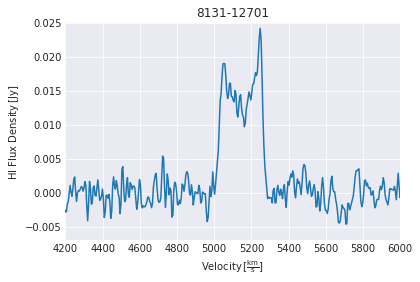

In [45]:
# plot the HI spectrum for 7443-12701
hi.plot_spectrum()
plt.xlim(4200,6000) #Use this to change the x and y limits. 
plt.ylim(-0.007,0.025)

In [46]:
#hi.get_target(plateifu)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

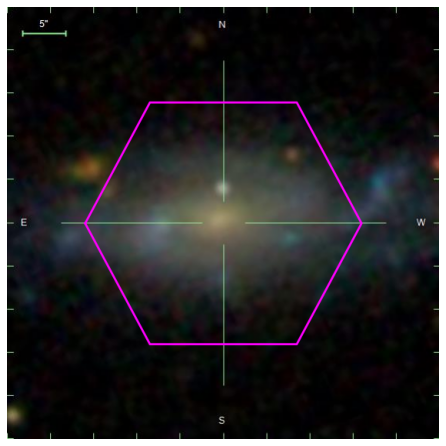

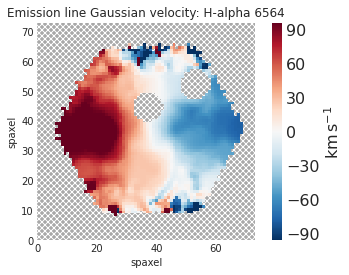

In [47]:
#Plot the optical image from SDSS with the MaNGA bundle overlaid, and Ha velocity map from MaNGA. 

image = Image(galaxy)
image.plot()

havel = maps.emline_gvel_ha_6564
havel.plot()

In [61]:
havel.value[17] 
#apparently this gets the middle row of the arrray


array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       , 101.116005 , 130.6605   , 114.52641  ,
        62.506966 ,  56.232018 ,  44.135418 ,  39.08222  ,  37.451294 ,
        37.23893  ,  31.962187 ,  29.097736 ,  34.642956 ,  38.59507  ,
        29.667095 ,  15.877297 ,  19.640491 ,  26.680538 ,  27.0561   ,
        23.54503  ,  21.301737 ,  20.558245 ,  20.31112  ,  16.86049  ,
        12.510221 ,   3.9425807,  -6.958245 , -17.186459 , -14.153433 ,
        -7.3923945,   5.547832 ,   6.186158 ,   1.9914372,  -1.2843729,
         1.3591769,   2.4747655,  -9.812427 , -26.328339 , -33.738213 ,
       -15.297439 ,  -3.0614684,  -2.6946464,  -5.4081383,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0. 

In [58]:
havel.ivar
havel[17,17] #plots this specific array input

<Marvin Map (property='emline_gvel_ha_6564')>
101.116005 km / s

In [62]:
havel.mask


array([[1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       ...,
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840]])

In [72]:
los_inputs = havel.value[21:22]
los_inputs

array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,  62.29409  ,
         61.964912 ,  61.280785 ,  63.003742 ,  64.542015 ,  65.56719  ,
         67.57583  ,  69.50938  ,  64.16233  ,  62.268875 ,  58.82653  ,
         58.318264 ,  58.78928  ,  52.983166 ,  48.626213 ,  42.275658 ,
         36.565247 ,  29.977943 ,  26.720211 ,  25.620552 ,  26.115635 ,
         26.243774 ,  25.792852 ,  25.356247 ,  24.917086 ,  24.102852 ,
         23.217106 ,  19.814203 ,  17.116129 ,  12.52565  ,   4.0144424,
         -5.2954473,  -9.294003 ,  -6.7752185,  -3.8284464,  -3.4422102,
         -6.7525964, -15.461344 , -33.616055 , -37.735413 , -34.093826 ,
        -22.154049 , -15.527229 , -13.450085 , -11.653759 , -11.459486 ,
        -11.808935 ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.

In [118]:
havel.value[50]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  81.30657   ,  76.53969   ,  74.040886  ,
        78.3019    ,  79.016396  ,  73.39133   ,  67.34393   ,
        62.937126  ,  56.613537  ,  52.52312   ,  48.84088   ,
        48.47359   ,  44.73383   ,  39.107216  ,  34.310173  ,
        32.060303  ,  30.665516  ,  30.07059   ,  27.436687  ,
        26.077229  ,  24.202442  ,  20.07947   ,  17.037905  ,
        11.650821  ,   8.407376  ,   5.8372717 ,   3.329124  ,
         1.666003  ,  -0.34069434,  -2.7070546 ,  -6.2943153 ,
       -11.429755  , -14.580533  , -16.99251   , -19.08214   ,
       -20.359327  ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , -45.894787  , -53.603924  ,
       -58.204063  , -60.71722   , -60.88617   , -59.15

In [121]:
havel.array


AttributeError: 'Map' object has no 'array' member

Text(0.5, 1.0, 'H-alpha velocity map values with H-alpha velocity masks')

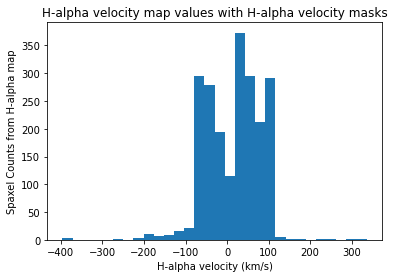

In [123]:
mask = mapplot.mask_low_snr(value=havel.value, ivar=havel.ivar, snr_min=3)
plt.hist(havel.value[mask==0], bins=30)
plt.xlabel("H-alpha velocity (km/s)")
plt.ylabel("Spaxel Counts from H-alpha map")
plt.title("H-alpha velocity map values with H-alpha velocity masks")
#plt.ylim(-10, 50)

Text(0, 0.5, 'Spaxel count')

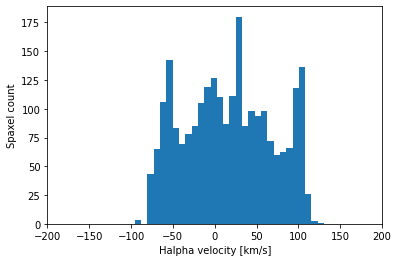

In [78]:
#mask out low S/N Halpha spaxels. 
ha = maps.emline_gflux_ha_6564
mask = mapplot.mask_low_snr(value=ha.value, ivar=ha.ivar, snr_min=3)

#Plot a histogram of the velocities in the Halpha map. 
plt.hist(havel.value[mask==0], bins=30)
plt.xlim(-200,200)
plt.xlabel("Halpha velocity [km/s]")
plt.ylabel("Spaxel count")

Text(0, 0.5, 'Halpha velocity')

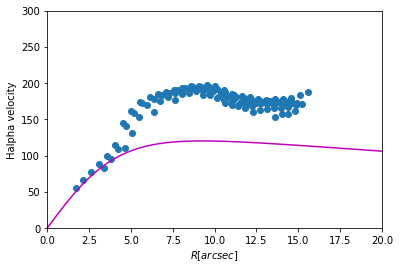

In [203]:
#This cell plots some of the Halpha velocity data and overplots the Yoon et al. model. 
#BE SURE TO MODIFY INCLINATION
radius = maps.spx_ellcoo_radius #radius in arcseconds as needed for model.


#Data - need to be close to kinematic axis, and abs value and corrected for inclination (divide by sin(i))
angle=maps.spx_ellcoo_azimuth #azimuth angle of spaxel (roughly lined up with kinematic axis - good enough)
#this is elliptical coordinates for spaxels

rdata=radius.value[(angle.value<30)]
#or (angle.value > 330) or ((angle.value-180 > -30) and (angle.value-180 < 30))]
veldata=np.abs(havel.value[(angle.value<30)])/np.sin(inc*np.pi/180.)
                    #or (angle.value > 330) or ((angle.value-180 > -30) and (angle.value-180 < 30))]

rdata=rdata[veldata>5] #get rid of zero values
veldata=veldata[veldata>5]

plt.scatter(rdata,veldata)

#Model
r=np.arange(0,np.max(radius.value),0.1)
Vr = Vc * np.tanh(r/Rt) + sout*r
plt.plot(r,Vr,'m')

plt.xlim(0,20)
plt.ylim(0, 300)
plt.xlabel(r'$ R [arcsec] $')
plt.ylabel('Halpha velocity')